# Assignment 4

---

Samarth Kumar

## Q1: Naive Bayes

### 1. Conditional Probability Distribution

First, let's calculate the mean and variance for each feature in relation to the target variable

Conditional Means

| Feature       | Apartment | House   | Condo   |
|---------------|:---------:|:-------:|:-------:|
| Local Price   | 7.3327    | 5.7607  | 7.4159  |
| Bathrooms     | 1.2857    | 1.0714  | 1.3333  |
| Land Area     | 6.1039    | 6.6309  | 6.0247  |
| Living area   | 1.5050    | 1.3917  | 1.5533  |
| \# Garages    | 1.2143    | 1.0714  | 1.3333  |
| \# Rooms      | 6.8571    | 6.1429  | 6.8333  |
| \# Bedrooms   | 3.4286    | 3.0000  | 3.3333  |
| Age of home   | 38.7143   | 34.2857 | 39.6667 |

Conditional Variances

| Feature       | Apartment | House    | Condo    |
|---------------|:---------:|:--------:|:--------:|
| Local Price   | 11.2075   | 0.2786   | 17.7197  |
| Bathrooms     | 0.2755    | 0.0306   | 0.3056   |
| Land Area     | 9.1010    | 4.3353   | 5.3966   |
| Living area   | 0.4249    | 0.0389   | 0.7106   |
| \# Garages    | 0.4184    | 0.6020   | 0.2222   |
| \# Rooms      | 1.5510    | 0.4082   | 2.1389   |
| \# Bedrooms   | 0.8163    | 0.2857   | 0.5556   |
| Age of home   | 184.7755  | 138.7755 | 162.2222 |


Hand calculations for 2 of the features:

For the first one, I calculated P(Bathrooms | Apartment), using the first test sample, where House ID = 24.

For the second one, I calculated P(Land Area | House), using the the second test sample, where House ID = 25.

Using the calculated mean and variance, I used the Gaussian pdf to calculate the actual conditional probabilities for each example:

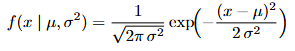

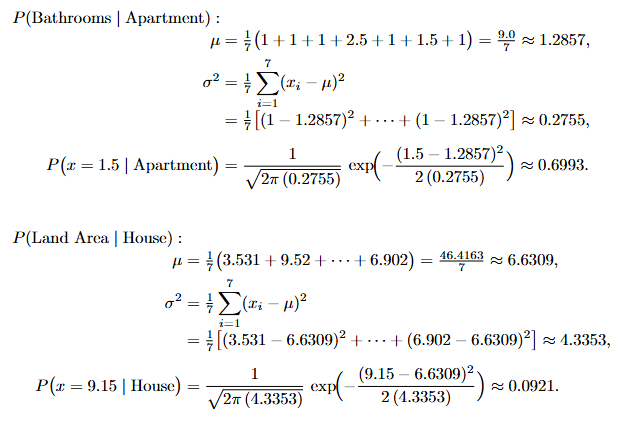

### 2. Construct a Naive Bayes Classifier

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score

Hardcoded conditional probability distributions to use.

In [2]:
priors = {
    'Apartment': 0.35, # 7/20
    'House': 0.35, # 7/20
    'Condo': 0.30 # 6/20
}

In [3]:
params = {
    'Local Price': {
        'Apartment': {'mean': 7.3327, 'variance': 11.2075},
        'House':     {'mean': 5.7607, 'variance':  0.2786},
        'Condo':     {'mean': 7.4159, 'variance': 17.7197},
    },
    'Bathrooms': {
        'Apartment': {'mean': 1.2857, 'variance': 0.2755},
        'House':     {'mean': 1.0714, 'variance': 0.0306},
        'Condo':     {'mean': 1.3333, 'variance': 0.3056},
    },
    'Land Area': {
        'Apartment': {'mean': 6.1039, 'variance':  9.1010},
        'House':     {'mean': 6.6309, 'variance':  4.3353},
        'Condo':     {'mean': 6.0247, 'variance':  5.3966},
    },
    'Living area': {
        'Apartment': {'mean': 1.5050, 'variance': 0.4249},
        'House':     {'mean': 1.3917, 'variance': 0.0389},
        'Condo':     {'mean': 1.5533, 'variance': 0.7106},
    },
    '# Garages': {
        'Apartment': {'mean': 1.2143, 'variance': 0.4184},
        'House':     {'mean': 1.0714, 'variance': 0.6020},
        'Condo':     {'mean': 1.3333, 'variance': 0.2222},
    },
    '# Rooms': {
        'Apartment': {'mean': 6.8571, 'variance': 1.5510},
        'House':     {'mean': 6.1429, 'variance': 0.4082},
        'Condo':     {'mean': 6.8333, 'variance': 2.1389},
    },
    '# Bedrooms': {
        'Apartment': {'mean': 3.4286, 'variance': 0.8163},
        'House':     {'mean': 3.0000, 'variance': 0.2857},
        'Condo':     {'mean': 3.3333, 'variance': 0.5556},
    },
    'Age of home': {
        'Apartment': {'mean': 38.7143, 'variance': 184.7755},
        'House':     {'mean': 34.2857, 'variance': 138.7755},
        'Condo':     {'mean': 39.6667, 'variance': 162.2222},
    }
}

Load the data

(The openpyxl installation is only necessary when running locally, not needed for Google Colab)

In [4]:
!pip install openpyxl

In [5]:
df_test = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Test')
df_train = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Train')

In [6]:
# Get the features from the training data
features = df_train.columns[:-1].tolist()
features

['House ID',
 'Local Price',
 'Bathrooms',
 'Land Area',
 'Living area',
 '# Garages',
 '# Rooms',
 '# Bedrooms',
 'Age of home']

In [7]:
'''
Create the predictions using the conditional probabilities and priors.
'''

# Get the actual labels (y_test)
y_test = df_test['Construction type'].tolist()

# Store the predictions.
y_pred = []

for _, row in df_test.iterrows():
    class_prob = {}
    for cls, prior in priors.items():
        current = prior
        for feat, class_dict in params.items():
            
            # Get mean and variance.
            currentMean  = class_dict[cls]['mean']
            currentVariance = class_dict[cls]['variance']

            # Calculate the conditional probability using Gaussian pdf. 
            gaussian = 1.0 / math.sqrt(2 * math.pi * currentVariance) * \
                math.exp(- (row[feat] - currentMean)**2 / (2 * currentVariance))
            current  *= gaussian
        
        # Update the prior
        class_prob[cls] = current

    # Normalize to get the actual conditional probabilities.
    total = sum(class_prob.values())
    post = {c: class_prob[c]/total for c in class_prob}
    pred = max(post, key=post.get)
    y_pred.append(pred)

    # Output each class probability and the actual prediction.
    print(f"House ID {int(row['House ID'])}:")
    for c, prob in post.items():
        print(f"\t{c} = {prob:.4f}")
    print(f"Predicted Class: {pred}\n")

House ID 24:
	Apartment = 0.1156
	House = 0.7752
	Condo = 0.1092
Predicted Class: House

House ID 25:
	Apartment = 0.6551
	House = 0.0000
	Condo = 0.3449
Predicted Class: Apartment

House ID 26:
	Apartment = 0.7560
	House = 0.0034
	Condo = 0.2406
Predicted Class: Apartment

House ID 27:
	Apartment = 0.5136
	House = 0.0000
	Condo = 0.4864
Predicted Class: Apartment

House ID 28:
	Apartment = 0.4669
	House = 0.0000
	Condo = 0.5331
Predicted Class: Condo



Check the accuracy for the model.

In [8]:
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {acc:.4f}")


Test Set Accuracy: 0.2000


The test set accuracy was pretty low, (**0.20**). This is due to the small, very limited dataset. Another issue was that an instance of the 'Condo' type was predicted despite only existing in the train set and not in the test set.

## Q2: Decision Tree

### 1. Decision Tree with default parameters

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(df_train[features], df_train['Construction type'])
yPred_train = dt.predict(df_train[features])
yPred_test = dt.predict(df_test[features])

a) Training set accuracy

In [10]:
train_acc = accuracy_score(df_train['Construction type'], yPred_train)
print(f"\nDecision Tree Classifier Train Accuracy: {train_acc:.4f}")


Decision Tree Classifier Train Accuracy: 1.0000


b) Test set accuracy

In [11]:
test_acc = accuracy_score(df_test['Construction type'], yPred_test)
print(f"Decision Tree Classifier Test Accuracy: {test_acc:.4f}")

Decision Tree Classifier Test Accuracy: 0.4000


The train accuracy was 1.0 and the test accuracy was 0.4. This likely indicates overfitting because the model memorized the data and failed to generalize on the test set.

### 2. Effect of restricting maximum depth?

In [12]:
lengths = range(1, 11)

for l in lengths:
    print('Decision Tree Classifier with max depth', l)
    dt = DecisionTreeClassifier(max_depth=l, random_state=42)
    dt.fit(df_train[features], df_train['Construction type'])
    yPred_train = dt.predict(df_train[features])
    yPred_test = dt.predict(df_test[features])
    train_acc = accuracy_score(df_train['Construction type'], yPred_train)
    test_acc = accuracy_score(df_test['Construction type'], yPred_test)
    print(f"\tTrain Accuracy: {train_acc:.4f}")
    print(f"\tTest Accuracy: {test_acc:.4f}\n")

Decision Tree Classifier with max depth 1
	Train Accuracy: 0.5500
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 2
	Train Accuracy: 0.7500
	Test Accuracy: 0.6000

Decision Tree Classifier with max depth 3
	Train Accuracy: 0.9000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 4
	Train Accuracy: 0.9500
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 5
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 6
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 7
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 8
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 9
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000

Decision Tree Classifier with max depth 10
	Train Accuracy: 1.0000
	Test Accuracy: 0.4000



For most of the tree depths, the train accuracy is 1.0 and test accuracy is 0.40, just like the default decision tree.

However, the best **max_depth is 2**, because the results are more balanced, as it has the highest test accuracy of 0.60, despite the training accuracy decreasing to 0.75.

### 3. Why restricting the depth has a strong effect on the performance?

The max_depth parameter determines how deep the tree can grow. So, the lower the max_depth, the fewer splits the tree makes, so a very low max_depth results in a simpler model that could potentially underfit (high bias, low variance). A higher max_depth, meaning the tree can make many splits, allows the tree to learn more detailed patterns while also risking overfitting (low bias, high variance).

In the example with this assignment's dataset, a max_depth of 2 was enough to achieve the best test accuracy. A max_depth of 1 resulted in a low train and test accuracy because the model was too simple, while a max_depth of 3 or higher resulted in a 100% train accuracy while decreasing the test accuracy. 

### 4. Decision Tree with a fixed test data point. 
* Local Price = 9.0384
* Bathrooms = 1
* Land Area = 7.8
* Living area = 1.5
* Garages = 1.5
* Rooms = 7
* Bedrooms = 3
* Age of home = 23


In [13]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(df_train[features[1:]], df_train['Construction type'])
test_point = [9.0384, 1.0, 7.8, 1.5, 1.5, 7.0, 3.0, 23.0]
print("Predicted Class:", dt.predict([test_point])[0])
print("Probabilities:", dt.predict_proba([test_point])[0])

Predicted Class: Apartment
Probabilities: [1. 0. 0.]


c:\Users\skuma\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\skuma\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The model is 100% confident that the test point is an Apartment, as this type had a reported probability of 1.0 while every other type had a 0.0 probability. The model was trained using the full training dataset, so it has seen instances of Houses and Condos as well.

In [14]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=features[1:], max_depth=2))

|--- Age of home <= 36.00
|   |--- Local Price <= 8.41
|   |   |--- class: House
|   |--- Local Price >  8.41
|   |   |--- class: Apartment
|--- Age of home >  36.00
|   |--- Local Price <= 4.55
|   |   |--- class: Condo
|   |--- Local Price >  4.55
|   |   |--- class: Apartment



As you can see from the printed tree where the max_depth is 2, the tree will predict Apartment if:
1. Age of home <= 36 and Local Price > 8.41 (in the test point, the local price is 9.0384).
2. Age of home > 36 and Local Price > 4.55 (the local price of 9.0384 > 4.55).

So it makes sense why Apartment was predicted.